In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__deprecated_num_index_names',
 '__dir__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_testing',
 '

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

house_price = pd.read_csv('/kaggle/input/house-pricessss/house_prices.csv')

house_price.columns

Index(['Area', 'Price'], dtype='object')

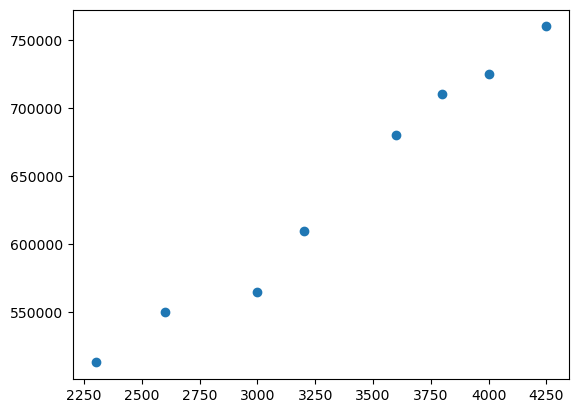

In [49]:
plt.scatter(house_price['Area'],house_price['Price'])

In [16]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [50]:
import statsmodels.api as sm 

X = house_price['Area'].tolist()
y = house_price['Price'].tolist()

X = sm.add_constant(X)

ols = sm.OLS(y,X).fit()

ols.summary()

/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     263.1
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           3.49e-06
Time:                        20:07:41   Log-Likelihood:                -87.014
No. Observations:                   8   AIC:                             178.0
Df Residuals:                       6   BIC:                             178.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.98e+05   2.77e+04      7.150      0.000     1.3e+05    2.66e+05
x1           131.9267      8.133     16.222      0.000     112.027     151.827
==============================================================================
Omnibus:                        6.340   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                2.144
Skew:                          -1.251   Prob(JB):                        0.342
Kurtosis:                       3.420   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
results = ols.get_prediction(X)

pred_y = results.predicted_mean

#y = (198000 + X * 131.9267)
#plt.plot(X, pred_y, 'o')
#plt.plot(X,y)

array([1.0e+00, 2.6e+03])